In [38]:
## https://www.kaggle.com/c/house-prices-advanced-regression-techniques
 
#import relevant libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
%matplotlib inline
%config IPCompleter.greedy=True

In [39]:
#importing data
train = pd.read_csv('pricingTrain.csv')
test = pd.read_csv('pricingTest.csv')

train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
## Check for missing variable
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness :1.882876
Kurtosis :6.536282


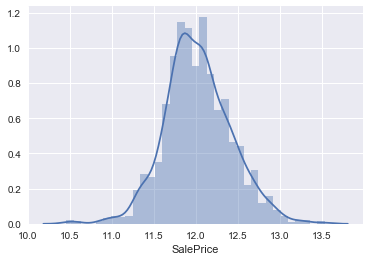

In [59]:
## Distribution of sale price
sns.distplot(train['SalePrice'].apply(np.log))

print("Skewness :%f" % train['SalePrice'].skew())
print("Kurtosis :%f" % train['SalePrice'].kurt())

train["SalePriceLog"] = np.log(train["SalePrice"])

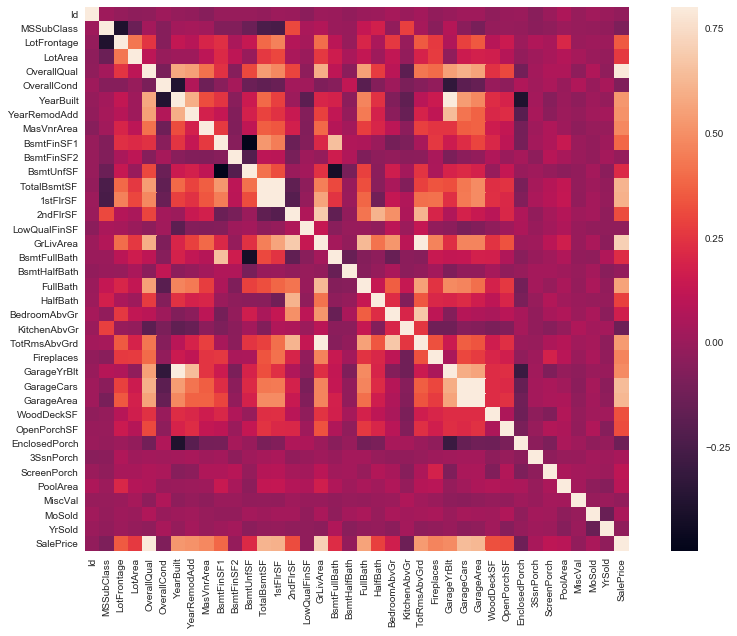

In [45]:
## Correlation matrix
cormat = train.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cormat, vmax = .8, square = True)

ValueError: labels [ 523 1298] not contained in axis

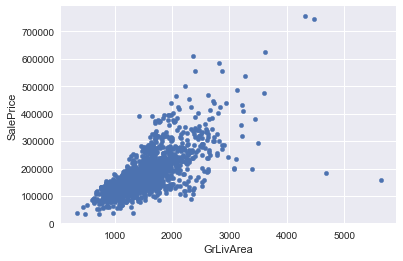

In [75]:
## Relationship between GrLivArea
data1 = pd.concat([train['SalePrice'], train['GrLivArea']], axis = 1)
data1.plot.scatter(x='GrLivArea', y = 'SalePrice')
train.drop((train[train['GrLivArea'] > 4500].index), axis = 1)
data1 = pd.concat([train['SalePrice'], train['GrLivArea']], axis = 1)
data1.plot.scatter(x='GrLivArea', y = 'SalePrice')

Object `drop` not found.


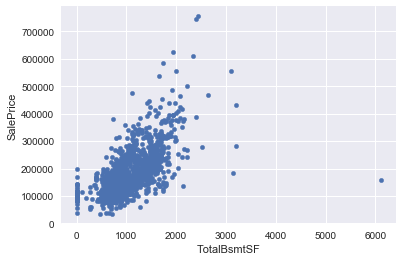

In [25]:
## Relationship between TotalBsmtSF
data2 = pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis = 1)
data2.plot.scatter(x='TotalBsmtSF', y = 'SalePrice')

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


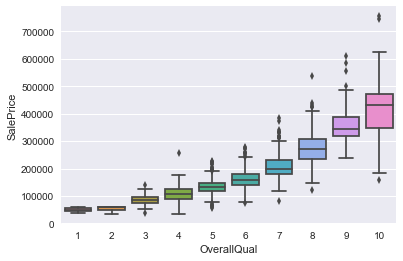

In [26]:
## Relationship between OverallQual
data3 = pd.concat([train['SalePrice'], train['OverallQual']], axis = 1)
sns.boxplot(x='OverallQual', y = 'SalePrice', data = data3)

C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


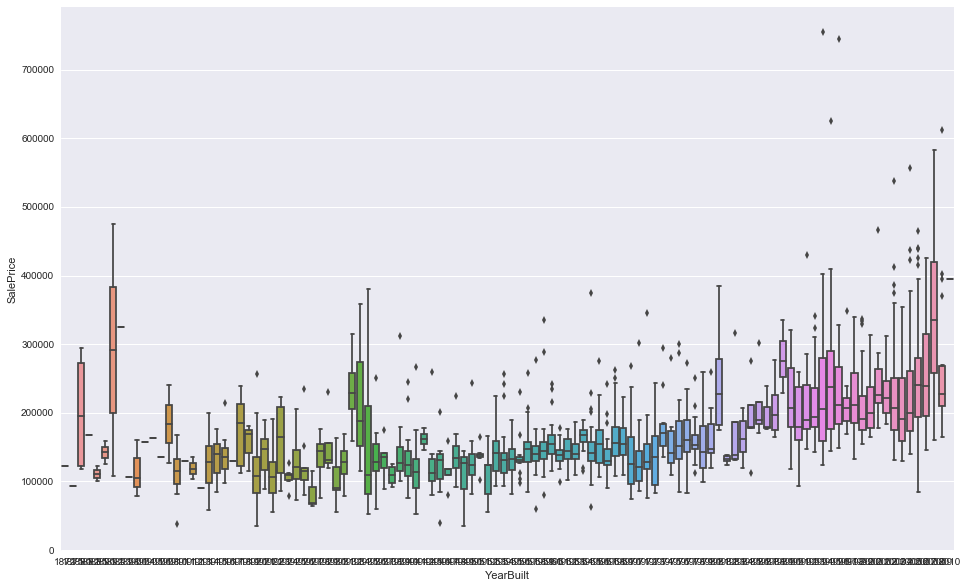

In [27]:
## Relationship between YearBuilt
data4 = pd.concat([train['SalePrice'], train['YearBuilt']], axis = 1)
plt.subplots(figsize=(16,10))
fig = sns.boxplot(x='YearBuilt', y = 'SalePrice', data = data4)

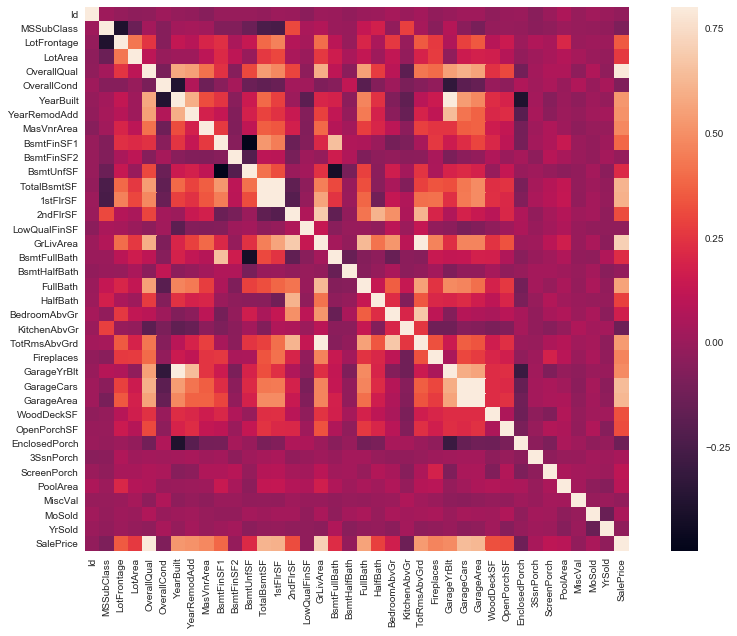

In [28]:
## Correlation matrix
cormat = train.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cormat, vmax = .8, square = True)

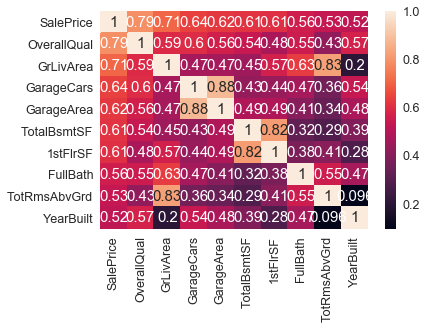

In [29]:
## Saleprice Correlation Matrix
k = 10
cols = cormat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, yticklabels = cols.values, xticklabels=cols.values)
plt.show()

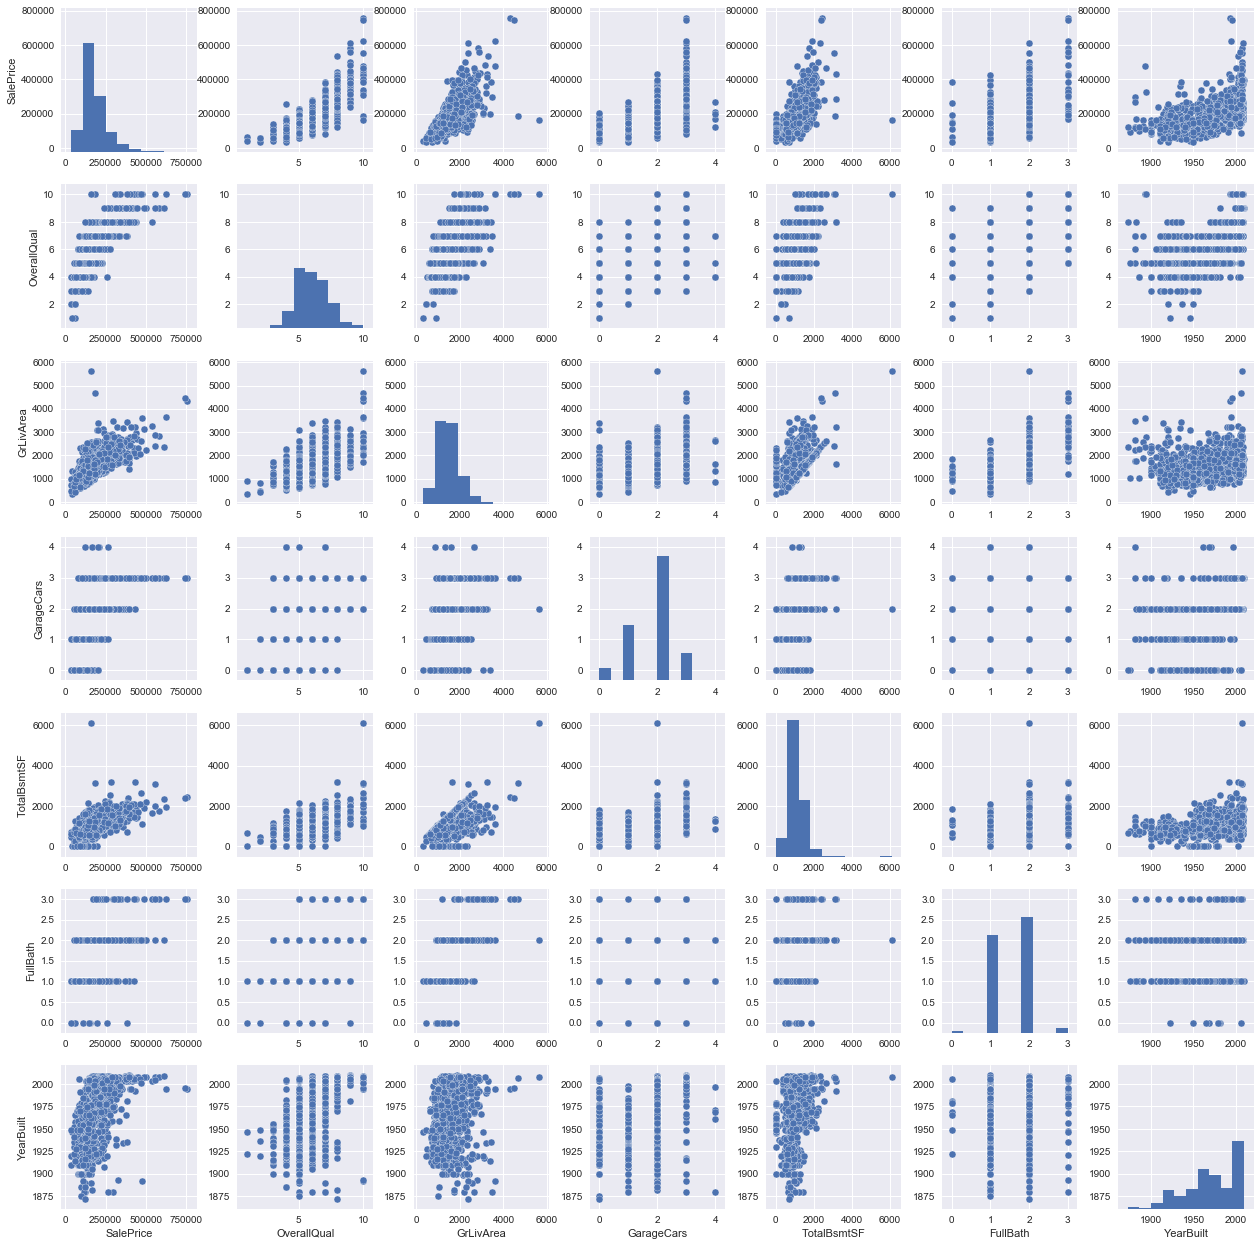

In [30]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [31]:
## Missing Data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
missing.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [32]:
train = train.drop((missing[missing['Total'] > 1]).index,1)